In [23]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sklearn functions and models
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef


In [24]:
data = pd.read_csv('../data_processed/data_final_aggregates.csv')
data.drop(columns = ['Unnamed: 0'], axis = 1, inplace = True)
display(data)

,age,education,n_score,e_score,o_score,a_score,c_score,impulsiveness,ss,alcohol,...,ireland,uk,usa,male,female,depr_add_aggr,depr_woa_add_aggr,hall_add_aggr,hall_woc_add_aggr,stim_add_aggr
0,0.49788,-0.05921,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,5,...,0,1,0,0,1,0,0,0,0,0
1,-0.07854,1.98437,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,5,...,0,1,0,1,0,0,0,0,0,1
2,0.49788,-0.05921,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,6,...,0,1,0,1,0,1,0,0,0,0
3,-0.95197,1.16365,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,4,...,0,1,0,0,1,0,0,0,0,0
4,0.49788,1.98437,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,4,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,-0.95197,-0.61113,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,5,...,0,0,1,0,1,1,1,1,1,0
1881,-0.95197,-0.61113,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,5,...,0,0,1,1,0,0,0,2,2,1
1882,-0.07854,0.45468,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,4,...,0,0,1,0,1,2,2,1,0,2
1883,-0.95197,-0.61113,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,5,...,0,0,1,0,1,1,1,2,2,1


In [25]:
#dt are the 3 drug types for which we run the models 
#select dt to choose drug type

dt = 'hall_add_aggr'

if dt not in ['hall_add_aggr','stim_add_aggr', 'depr_add_aggr', 'depr_woa_add_aggr', 'hall_woc_add_aggr']:
    raise ValueError('dt has to be one of: hall_add_aggr, stim_add_aggr, depr_add_aggr', 'depr_woa_add_aggr','hall_woc_add_aggr')

## Tuning notebook parameters

In [26]:
data[dt]
data.columns

Index(['age', 'education', 'n_score', 'e_score', 'o_score', 'a_score',
       'c_score', 'impulsiveness', 'ss', 'alcohol', 'anphet', 'amyl', 'benzo',
       'caffeine', 'cannabis', 'chocolate', 'cocaine', 'crack', 'ecstasy',
       'heroine', 'ketamine', 'legal_h', 'lsd', 'meth', 'mushrooms',
       'nicotine', 'semer', 'vsa', 'asian', 'black_asian', 'white_asian',
       'white_black', 'other', 'white', 'other2', 'australia', 'canada',
       'new_zealand', 'ireland', 'uk', 'usa', 'male', 'female',
       'depr_add_aggr', 'depr_woa_add_aggr', 'hall_add_aggr',
       'hall_woc_add_aggr', 'stim_add_aggr'],
      dtype='object')

In [27]:
substances = ['alcohol','anphet', 'amyl', 'benzo', 'caffeine', 'cannabis', 
              'chocolate', 'cocaine', 'crack', 'ecstasy', 'heroine', 'ketamine', 
              'legal_h', 'lsd', 'meth', 'mushrooms', 'nicotine', 'semer', 'vsa', 'male']

nationality = ['australia', 'canada', 'new_zealand', 'ireland', 'uk', 'usa']

race = ['asian', 'black_asian', 'white_asian','white_black', 'other', 'white', 'other2']

data.drop(columns=substances, inplace=True, axis=1)
data

,age,education,n_score,e_score,o_score,a_score,c_score,impulsiveness,ss,asian,...,new_zealand,ireland,uk,usa,female,depr_add_aggr,depr_woa_add_aggr,hall_add_aggr,hall_woc_add_aggr,stim_add_aggr
0,0.49788,-0.05921,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,0,...,0,0,1,0,1,0,0,0,0,0
1,-0.07854,1.98437,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,0,...,0,0,1,0,0,0,0,0,0,1
2,0.49788,-0.05921,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0,...,0,0,1,0,0,1,0,0,0,0
3,-0.95197,1.16365,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,0,...,0,0,1,0,1,0,0,0,0,0
4,0.49788,1.98437,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,-0.95197,-0.61113,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,0,...,0,0,0,1,1,1,1,1,1,0
1881,-0.95197,-0.61113,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,0,...,0,0,0,1,0,0,0,2,2,1
1882,-0.07854,0.45468,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,0,...,0,0,0,1,1,2,2,1,0,2
1883,-0.95197,-0.61113,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,0,...,0,0,0,1,1,1,1,2,2,1


Text(0.5, 1.0, 'Stimulants mutual information')

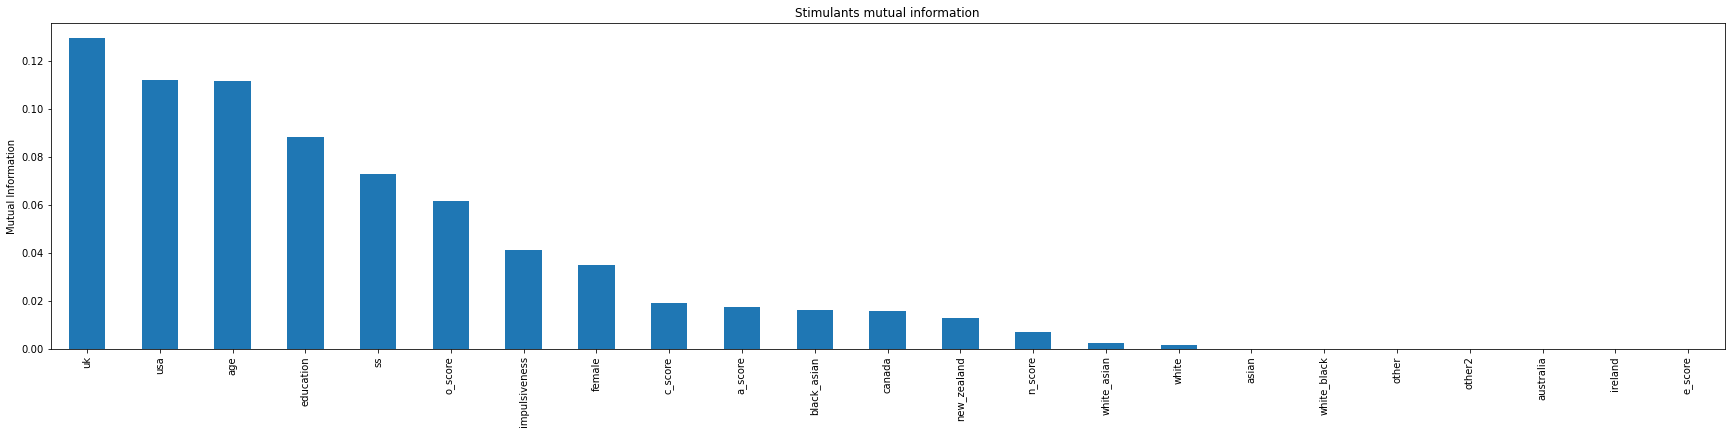

In [28]:
# where more information is stored (I think, does someone know it better?)

data[dt].replace(2,1, inplace = True) #just 2 classes not three
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns = ['hall_add_aggr','stim_add_aggr', 'depr_add_aggr','depr_woa_add_aggr','hall_woc_add_aggr'], axis=1), 
                                                    data[dt], test_size=0.25, random_state=0)

mi = mutual_info_classif(X_train, y_train)
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False).plot.bar(figsize=(30, 6))
plt.ylabel('Mutual Information')
plt.title('Stimulants mutual information')

## Balance class

In [29]:
import imblearn
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)
y_train.value_counts() 

0    848
1    848
Name: hall_add_aggr, dtype: int64

# Logistic regression

MCC score: 0.6341745934444332


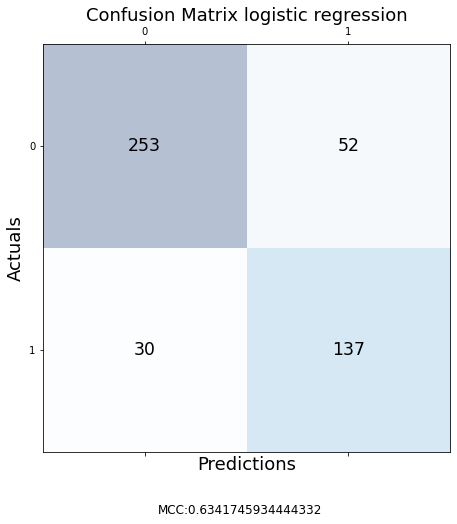

array([[-0.71330945, -0.40371344, -0.14865427, -0.06633274,  0.61393684,
         0.1000909 , -0.1223138 ,  0.08111477,  0.37948679, -0.47244751,
         0.47030298,  0.53388066, -0.91684419, -1.34484771, -0.08179128,
        -0.9699669 , -0.69192012, -1.10926454, -0.07965097, -1.15594103,
        -2.47417272, -0.60698617, -0.93826501]])

In [30]:
#training 
model = LogisticRegression(random_state = 0, max_iter=10000)
model.fit(X_train, y_train)

#prediction
y_pred = model.predict(X_test)
MCC1 = matthews_corrcoef(y_test, y_pred)
print(f"MCC score: {MCC1}")

cm1 = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm1, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm1.shape[0]):
    for j in range(cm1.shape[1]):
        ax.text(x=j, y=i,s=cm1[i, j], va='center', ha='center', size='xx-large')

        
txt= 'MCC:' + str(MCC1)

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix logistic regression', fontsize=18)
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()
#fig.savefig('../img/' + dt + 'confusion_matrix_stim_log_reg.png') just for the mid term report

model.coef_

In [31]:
(zip(list(X_train.columns),list(model.coef_)))

In [32]:
zippato = list(zip(list(X_train.columns), model.coef_.tolist()[0]))

zippato

[('age', -0.7133094457834224),
 ('education', -0.4037134363607462),
 ('n_score', -0.14865426954157862),
 ('e_score', -0.06633273846417842),
 ('o_score', 0.6139368353548271),
 ('a_score', 0.1000909023568166),
 ('c_score', -0.12231379613731104),
 ('impulsiveness', 0.0811147661927784),
 ('ss', 0.379486789028494),
 ('asian', -0.472447514507219),
 ('black_asian', 0.47030298287666755),
 ('white_asian', 0.5338806619555699),
 ('white_black', -0.9168441876221481),
 ('other', -1.3448477132553642),
 ('white', -0.08179128334432549),
 ('other2', -0.9699668951502554),
 ('australia', -0.6919201193675775),
 ('canada', -1.1092645382179909),
 ('new_zealand', -0.07965096668668771),
 ('ireland', -1.155941031979793),
 ('uk', -2.474172720877208),
 ('usa', -0.6069861717064049),
 ('female', -0.9382650120158226)]

In [33]:
from sklearn.metrics import fbeta_score, make_scorer
MCC_scorer = make_scorer(matthews_corrcoef)
MCC_scorer

make_scorer(matthews_corrcoef)

In [34]:
cv = KFold(n_splits=5, random_state=1, shuffle=True) # more than 6 --> overfit
scores = cross_val_score(model, data.drop(columns = [ 'hall_add_aggr','stim_add_aggr', 'depr_add_aggr','depr_woa_add_aggr','hall_woc_add_aggr'], axis=1), 
                         data[dt], scoring=MCC_scorer , cv=cv, n_jobs=-1)


print('MCC: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

MCC: 0.595 (0.013)


# SVM

SVM method: linear 

MCC linear is: 0.6221277735669466


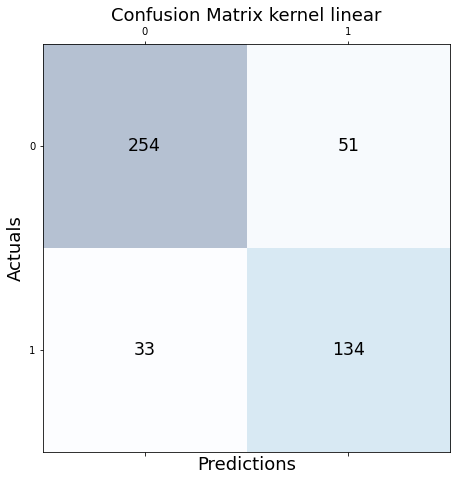

MCC K-Fold: 0.600 (0.021)


SVM method: poly 

MCC poly is: 0.5867311018776108


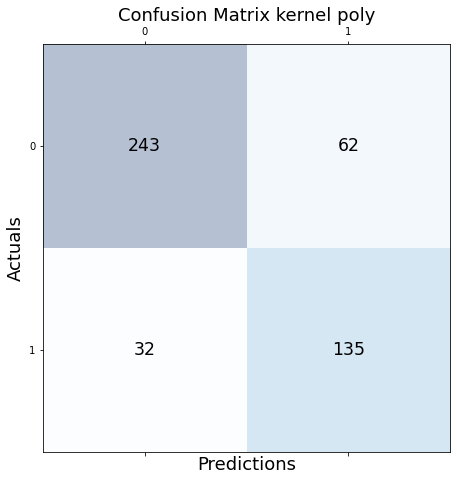

MCC K-Fold: 0.579 (0.029)


SVM method: rbf 

MCC rbf is: 0.6049482879632585


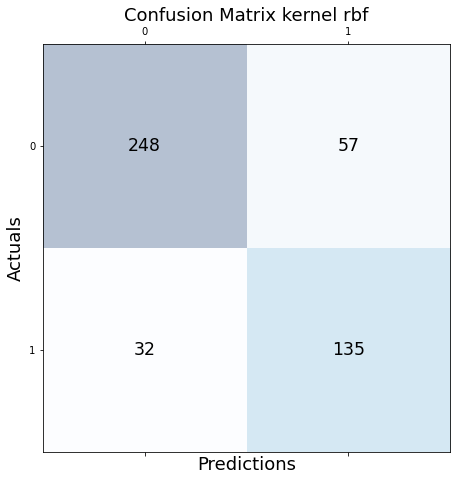

MCC K-Fold: 0.595 (0.023)


SVM method: sigmoid 

MCC sigmoid is: 0.470414689449638


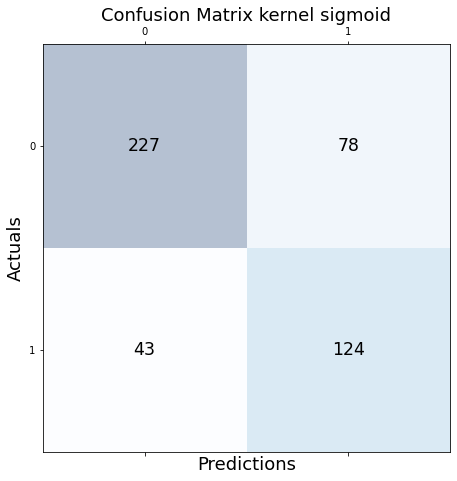

MCC K-Fold: 0.469 (0.029)




In [35]:
from sklearn.svm import SVC

for kern in ['linear', 'poly', 'rbf', 'sigmoid']: #try all different Kernel method
    print(f'SVM method: {kern} \n')
    title = 'Confusion Matrix kernel ' + kern
    model = SVC(kernel = kern, random_state = 0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    MCC = matthews_corrcoef(y_test, y_pred)
    print(f"MCC {kern} is: {MCC}")
    #spec1 = specificity(y_test, y_pred)
    #print(f"Specificity score: {spec1}") #not sure it is correct
    cm1 = confusion_matrix(y_test, y_pred) 
    fig, ax = plt.subplots(figsize=(7.5, 7.5))
    ax.matshow(cm1, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(cm1.shape[0]):
        for j in range(cm1.shape[1]):
            ax.text(x=j, y=i,s=cm1[i, j], va='center', ha='center', size='xx-large')

    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title(title , fontsize=18)
    plt.show() #doesn't work boh
    
    cv = KFold(n_splits=4, random_state=1, shuffle=True) # more than 6 --> overfit
    scores = cross_val_score(model, data.drop(columns = [ 'hall_add_aggr','stim_add_aggr', 'depr_add_aggr','depr_woa_add_aggr','hall_woc_add_aggr'], axis=1), 
                         data[dt], scoring=MCC_scorer, cv=cv, n_jobs=-1)

    # report performance
    print('MCC K-Fold: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))
    print('\n')
    
    #fig.savefig('../img/' + dt + 'confusion_matrix_stim_svm.png') just for the mid term report

#  K-Neighboors Classifier

In [36]:
from sklearn.neighbors import KNeighborsClassifier

#it stopped word bohhh. It isn't working with categories, change to int

# facultative: create a function to convert categories to number
#smart solution: re run the functio hahahha :)   
    
model = KNeighborsClassifier(n_neighbors = 9, metric = 'minkowski', p = 2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
#print(y_train)
MCC3 = matthews_corrcoef(y_test, y_pred)
print(f"MCC3: {MCC3}")

#no k-folding (is it necessary?) I have done it, it's crap

#fig.savefig('../img/' + dt + 'confusion_matrix_stim_k_neigh.png') just for the mid term report

MCC3: 0.5226622781686496


In [37]:
cv = KFold(n_splits=5, random_state=1, shuffle=True) # more than 6 --> overfit
scores = cross_val_score(model, data.drop(columns = [ 'hall_add_aggr','stim_add_aggr', 'depr_add_aggr','depr_woa_add_aggr','hall_woc_add_aggr'], axis=1), 
                         data[dt], scoring=MCC_scorer, cv=cv, n_jobs=-1)
# report performance
print('MCC K-neigh: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

MCC K-neigh: 0.578 (0.026)


# Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
MCC4 = matthews_corrcoef(y_test, y_pred)
print(f"MCC: {MCC4}")

#fig.savefig('../img/' + dt + 'confusion_matrix_stim_dec_trees.png') just for the mid term report


MCC: 0.40650934993538146


In [39]:
cv = KFold(n_splits=5, random_state=1, shuffle=True) # more than 6 --> overfit
scores = cross_val_score(model, data.drop(columns = [ 'hall_add_aggr','stim_add_aggr', 'depr_add_aggr','depr_woa_add_aggr','hall_woc_add_aggr'], axis=1), 
                         data[dt], scoring=MCC_scorer, cv=cv, n_jobs=-1)
# report performance
print('F1 Decision Tree: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

F1 Decision Tree: 0.448 (0.026)


# XGboost

In [40]:
import xgboost as xgb

[09:43:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Francesca\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


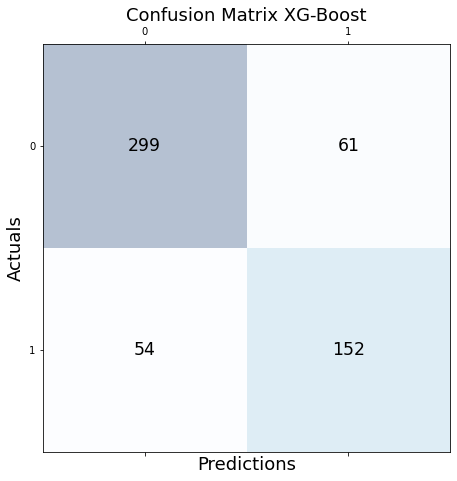

N train : 1586; N test : 566
MCC5: 0.5645166767325308
Running time: 0.6248672008514404


In [41]:
import time

tic = time.time()

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns = [ 'hall_add_aggr','stim_add_aggr', 'depr_add_aggr','depr_woa_add_aggr','hall_woc_add_aggr'], axis=1), 
                                                   data[dt], test_size=0.3, random_state=0)

oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

title = 'Confusion Matrix XG-Boost'    
    
#X_train = data.drop(columns = [ 'hall_add_aggr','stim_add_aggr', 'depr_add_aggr'], axis = 1)[:1319]
#y_train = data['stim_add_aggr'][:1319].tolist()

xgb_model.fit(X_train,y_train)

#X_test = data.drop(columns = [ 'hall_add_aggr','stim_add_aggr', 'depr_add_aggr'], axis = 1)[1319:]
#y_test = data['stim_add_aggr'][1319:].tolist()

y_pred = xgb_model.predict(X_test)

#print(y_train)
cm1 = confusion_matrix(y_test, y_pred) 
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm1, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm1.shape[0]):
    for j in range(cm1.shape[1]):
        ax.text(x=j, y=i,s=cm1[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title(title , fontsize=18)
plt.show() #doesn't work boh

print(f'N train : {len(X_train)}; N test : {len(X_test)}')


MCC5 = matthews_corrcoef(y_test, y_pred)
print(f"MCC5: {MCC5}")
#print(f"MCC: {MCC_xg}")

tac = time.time()

running_time = tac-tic

print(f'Running time: {running_time}')

#fig.savefig('../img/' + dt + 'confusion_matrix_stim_xg_boost.png') just for the mid term report

In [42]:
cv = KFold(n_splits=5, random_state=1, shuffle=True) # more than 6 --> overfit
scores = cross_val_score(xgb_model.fit(X_train,y_train), data.drop(columns = [ 'hall_add_aggr','stim_add_aggr', 'depr_add_aggr','depr_woa_add_aggr','hall_woc_add_aggr'], axis=1), 
                         data[dt], scoring=MCC_scorer, cv=cv, n_jobs=-1)
# report performance
print('F1 XG Boost: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

[09:43:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Francesca\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


F1 XG Boost: 0.532 (0.039)


# Random forest

In [43]:
from sklearn.ensemble import RandomForestClassifier

# rerun after XG-Boost
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns = [ 'hall_add_aggr','stim_add_aggr', 'depr_add_aggr','depr_woa_add_aggr','hall_woc_add_aggr'], axis=1), 
                                                    data[dt], test_size=0.3, random_state=0)

oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)
#y_train.value_counts()

rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
rf.fit(X_train, y_train)

y_pred_cont = rf.predict(X_test)


y_pred = [2 if i>1.5 else 1 if  i>0.5 else 0 for i in y_pred_cont] #convert to discrete variable 0.6 get the best acuracy

#fig.savefig('../img/' + dt + 'confusion_matrix_stim_random_forest.png') just for the mid term report

MCC6: 0.6064210914208794


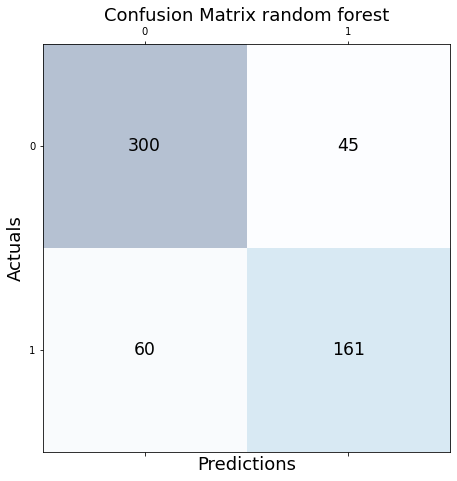

In [44]:
MCC6 = matthews_corrcoef(y_test, y_pred)
print(f"MCC6: {MCC6}")
spec1=9


cm1 = confusion_matrix(y_pred, y_test)

fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm1, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm1.shape[0]):
    for j in range(cm1.shape[1]):
        ax.text(x=j, y=i,s=cm1[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix random forest', fontsize=18)
plt.show()